In [1]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir("drive/My Drive/Capstone Data")

In [1]:
import pandas as pd
df=pd.read_csv("MSME Data Modified_v1.9_featureEngineered.csv")
#df=pd.read_csv("MSME Data Modified_v1.10_clean_withoutNA_ImpFeatures10.csv")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification

In [3]:
c = [29]
X = df.drop(df.columns[c], axis =1)
y = df['loan_default'].astype(int)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)

In [5]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Random Forest

In [58]:
## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.6184921388538042


In [10]:
ytrain_pred

array([[0.24, 0.76],
       [0.94, 0.06],
       [0.89, 0.11],
       ...,
       [0.97, 0.03],
       [0.87, 0.13],
       [0.22, 0.78]])

In [45]:
from sklearn.metrics import classification_report
# Train Prediction classification report
print(classification_report(y_train, rf_model.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20173
           1       1.00      1.00      1.00      5579

    accuracy                           1.00     25752
   macro avg       1.00      1.00      1.00     25752
weighted avg       1.00      1.00      1.00     25752



In [46]:
# Test Prediction classification report
print(classification_report(y_test, rf_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      4978
           1       0.39      0.01      0.02      1461

    accuracy                           0.77      6439
   macro avg       0.58      0.50      0.44      6439
weighted avg       0.69      0.77      0.68      6439



In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

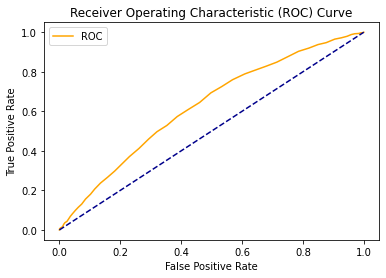

In [50]:
fpr, tpr, thresholds = roc_curve(y_test,rf_model.predict_proba(X_test)[:,1] )
plot_roc_curve(fpr,tpr)

In [7]:
import pickle
pickle.dump(rf_model, open("model_rf_loan_default_featengg_data.pkl", 'wb'))

In [59]:
# Feature Scaling #no need feature scaling for DT as they ar not based on euclidean dist and also will be easy to interpret
from sklearn.preprocessing import StandardScaler #but to visalize with high reolution(0.01),feature scaling helps to execute lot faster
sc = StandardScaler()                       #so we are keeping the feature scaling, but we can also remove feature scaling
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Fitting Decision Tree to the Training set
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = dt_classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [60]:
dt_classifier.fit(X_train, y_train)
ytrain_pred = dt_classifier.predict_proba(X_train)
print('Decision Tree train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = dt_classifier.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Decision Tree train roc-auc: 1.0
RF test roc-auc: 0.5112327918405667


In [79]:
from sklearn.metrics import classification_report
# Train Prediction classification report
print(classification_report(y_train, dt_classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20173
           1       1.00      1.00      1.00      5579

    accuracy                           1.00     25752
   macro avg       1.00      1.00      1.00     25752
weighted avg       1.00      1.00      1.00     25752



In [80]:
# Test Prediction classification report
print(classification_report(y_test, dt_classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.77      0.78      4978
           1       0.24      0.25      0.25      1461

    accuracy                           0.65      6439
   macro avg       0.51      0.51      0.51      6439
weighted avg       0.66      0.65      0.66      6439



In [81]:
cm

array([[3853, 1125],
       [1098,  363]], dtype=int64)

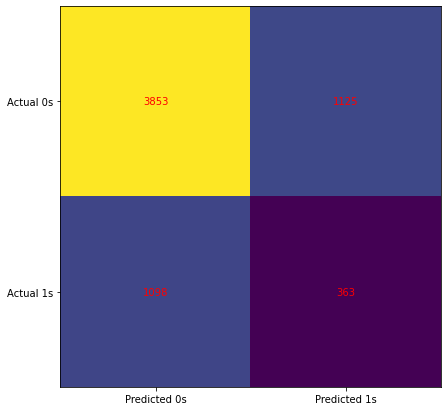

In [84]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

AUC: 0.5112327918405667


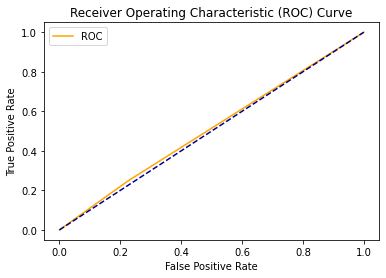

In [86]:
fpr, tpr, thresholds = roc_curve(y_test,dt_classifier.predict_proba(X_test)[:,1] )
auc = metrics.roc_auc_score(y_test, dt_classifier.predict_proba(X_test)[:,1])
plot_roc_curve(fpr,tpr)

In [88]:
import pickle
pickle.dump(dt_classifier, open("model_dt_loan_default_featengg_data.pkl", 'wb'))

### SVC

In [61]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Fitting Kernel SVM classifier to the Training set
from sklearn.svm import SVC
svc_classifier = SVC(kernel = 'rbf', random_state = 0, probability=True) #rbf is gaussian kernel
svc_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = svc_classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [97]:
ytrain_pred = svc_classifier.predict_proba(X_train)
ytrain_pred

array([[0.78337619, 0.21662381],
       [0.78337101, 0.21662899],
       [0.78338837, 0.21661163],
       ...,
       [0.78337781, 0.21662219],
       [0.78337212, 0.21662788],
       [0.78336242, 0.21663758]])

In [98]:
#svc_classifier.fit(X_train, y_train)
ytrain_pred = svc_classifier.predict_proba(X_train)
print('SVC train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = dt_classifier.predict_proba(X_test)
print('SVC test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

SVC train roc-auc: 0.5580604363046526
SVC test roc-auc: 0.5112327918405667


In [99]:
from sklearn.metrics import classification_report
# Train Prediction classification report
print(classification_report(y_train, svc_classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     20173
           1       1.00      0.00      0.00      5579

    accuracy                           0.78     25752
   macro avg       0.89      0.50      0.44     25752
weighted avg       0.83      0.78      0.69     25752



In [100]:
# Test Prediction classification report
print(classification_report(y_test, svc_classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      4978
           1       0.00      0.00      0.00      1461

    accuracy                           0.77      6439
   macro avg       0.39      0.50      0.44      6439
weighted avg       0.60      0.77      0.67      6439



D:\Study\Great Lakes\INtro to python\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [101]:
cm

array([[4978,    0],
       [1461,    0]], dtype=int64)

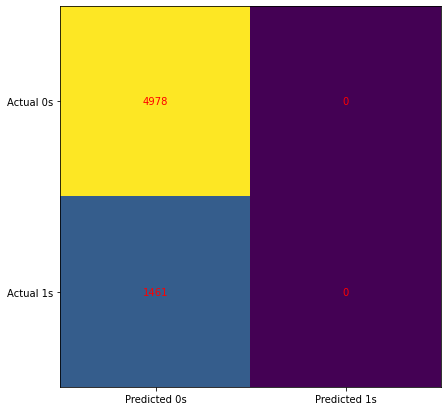

In [102]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

AUC: 0.5536874224685812


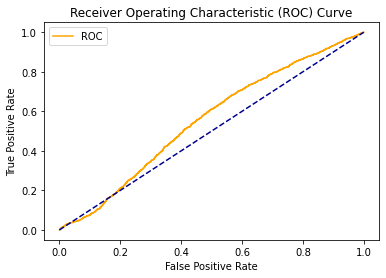

In [103]:
fpr, tpr, thresholds = roc_curve(y_test,svc_classifier.predict_proba(X_test)[:,1] )
auc = metrics.roc_auc_score(y_test, svc_classifier.predict_proba(X_test)[:,1])
plot_roc_curve(fpr,tpr)

In [104]:
import pickle
pickle.dump(svc_classifier, open("model_dt_loan_default_featengg_data.pkl", 'wb'))

Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression

log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.5768064300797563
Logistic test roc-auc: 0.5699850045195438


D:\Study\Great Lakes\INtro to python\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [8]:
from sklearn.metrics import classification_report
# Train Prediction classification report
print(classification_report(y_train, log_classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     20173
           1       0.33      0.00      0.00      5579

    accuracy                           0.78     25752
   macro avg       0.56      0.50      0.44     25752
weighted avg       0.69      0.78      0.69     25752



In [9]:
# Train Prediction classification report
print(classification_report(y_test, log_classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      4978
           1       1.00      0.00      0.00      1461

    accuracy                           0.77      6439
   macro avg       0.89      0.50      0.44      6439
weighted avg       0.82      0.77      0.67      6439



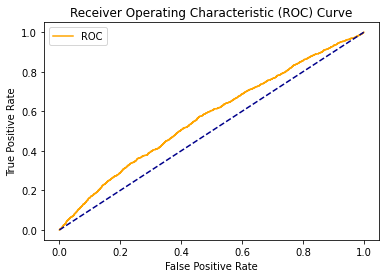

In [55]:
fpr, tpr, thresholds = roc_curve(y_test,log_classifier.predict_proba(X_test)[:,1] )
plot_roc_curve(fpr,tpr)

In [9]:
import pickle
pickle.dump(log_classifier, open("model_logreg_loan_default_featengg_data.pkl", 'wb'))

In [ ]:
solver='lbfgs',max_iter=10000

In [10]:
log_classifier2=LogisticRegression(solver='lbfgs',max_iter=10000)
log_classifier2.fit(X_train, y_train)
ytrain_pred = log_classifier2.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.5829472890648427
Logistic test roc-auc: 0.5699850045195438


In [12]:
pickle.dump(log_classifier2, open("model_logreg_hyp_tuned_loan_default_featengg_data.pkl", 'wb'))

In [11]:
# Train Prediction classification report
print(classification_report(y_train, log_classifier2.predict(X_train)))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     20173
           1       0.25      0.00      0.00      5579

    accuracy                           0.78     25752
   macro avg       0.52      0.50      0.44     25752
weighted avg       0.67      0.78      0.69     25752



In [12]:
# Test Prediction classification report
print(classification_report(y_test, log_classifier2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      4978
           1       0.00      0.00      0.00      1461

    accuracy                           0.77      6439
   macro avg       0.39      0.50      0.44      6439
weighted avg       0.60      0.77      0.67      6439



D:\Study\Great Lakes\INtro to python\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

log_classifier2=LogisticRegression(solver='lbfgs',max_iter=10000)
log_classifier2.fit(X_train_scaled, y_train)
ytrain_pred = log_classifier2.predict_proba(X_train_scaled)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test_scaled)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

# Train Prediction classification report
print(classification_report(y_train, log_classifier2.predict(X_train_scaled)))

# Test Prediction classification report
print(classification_report(y_test, log_classifier2.predict(X_test_scaled)))

Logistic train roc-auc: 0.6343559026395154
Logistic test roc-auc: 0.5024750930102031
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     20173
           1       0.57      0.00      0.00      5579

    accuracy                           0.78     25752
   macro avg       0.68      0.50      0.44     25752
weighted avg       0.74      0.78      0.69     25752

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      4978
           1       0.50      0.00      0.00      1461

    accuracy                           0.77      6439
   macro avg       0.64      0.50      0.44      6439
weighted avg       0.71      0.77      0.67      6439




Adaboost Classifier

In [63]:

from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.6516557570170917
Adaboost test roc-auc: 0.6371154228502742


In [14]:
pickle.dump(ada_classifier, open("model_adaboost_loan_default_featengg_data.pkl", 'wb'))

In [51]:
# Train Prediction classification report
print(classification_report(y_train, ada_classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     20173
           1       0.48      0.01      0.01      5579

    accuracy                           0.78     25752
   macro avg       0.63      0.50      0.45     25752
weighted avg       0.72      0.78      0.69     25752



In [52]:
# Test Prediction classification report
print(classification_report(y_test, ada_classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      4978
           1       0.43      0.01      0.01      1461

    accuracy                           0.77      6439
   macro avg       0.60      0.50      0.44      6439
weighted avg       0.70      0.77      0.68      6439



In [15]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train_scaled, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train_scaled)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test_scaled)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

# Train Prediction classification report
print(classification_report(y_train, ada_classifier.predict(X_train_scaled)))

# Test Prediction classification report
print(classification_report(y_test, ada_classifier.predict(X_test_scaled)))

Adaboost train roc-auc: 0.6516557570170917
Adaboost test roc-auc: 0.6371154228502742
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     20173
           1       0.48      0.01      0.01      5579

    accuracy                           0.78     25752
   macro avg       0.63      0.50      0.45     25752
weighted avg       0.72      0.78      0.69     25752

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      4978
           1       0.43      0.01      0.01      1461

    accuracy                           0.77      6439
   macro avg       0.60      0.50      0.44      6439
weighted avg       0.70      0.77      0.68      6439



In [16]:
# Feature Scaling
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train_scaled, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train_scaled)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test_scaled)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

# Train Prediction classification report
print(classification_report(y_train, ada_classifier.predict(X_train_scaled)))

# Test Prediction classification report
print(classification_report(y_test, ada_classifier.predict(X_test_scaled)))

Adaboost train roc-auc: 0.6516557570170917
Adaboost test roc-auc: 0.6371154228502742
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     20173
           1       0.48      0.01      0.01      5579

    accuracy                           0.78     25752
   macro avg       0.63      0.50      0.45     25752
weighted avg       0.72      0.78      0.69     25752

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      4978
           1       0.43      0.01      0.01      1461

    accuracy                           0.77      6439
   macro avg       0.60      0.50      0.44      6439
weighted avg       0.70      0.77      0.68      6439



KNN Classsifier

In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('KNN train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('KNN test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

KNN train roc-auc: 0.8037393333824809
KNN test roc-auc: 0.5419219652026754


In [16]:
pickle.dump(knn_classifier, open("model_KNN_loan_default_featengg_data.pkl", 'wb'))

In [53]:
# Train Prediction classification report
print(classification_report(y_train, knn_classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88     20173
           1       0.62      0.25      0.36      5579

    accuracy                           0.80     25752
   macro avg       0.72      0.60      0.62     25752
weighted avg       0.78      0.80      0.77     25752



In [54]:
# Test Prediction classification report
print(classification_report(y_test, knn_classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84      4978
           1       0.28      0.10      0.15      1461

    accuracy                           0.74      6439
   macro avg       0.53      0.51      0.50      6439
weighted avg       0.66      0.74      0.69      6439



###  Scaled data

In [65]:
# Feature Scaling
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train_scaled, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train_scaled)
print('KNN train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test_scaled)
print('KNN test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

# Train Prediction classification report
print(classification_report(y_train, knn_classifier.predict(X_train_scaled)))

# Test Prediction classification report
print(classification_report(y_test, knn_classifier.predict(X_test_scaled)))

KNN train roc-auc: 0.8104771971238889
KNN test roc-auc: 0.5367263460939289
              precision    recall  f1-score   support

           0       0.82      0.96      0.89     20173
           1       0.64      0.25      0.36      5579

    accuracy                           0.81     25752
   macro avg       0.73      0.61      0.62     25752
weighted avg       0.78      0.81      0.77     25752

              precision    recall  f1-score   support

           0       0.78      0.93      0.85      4978
           1       0.30      0.10      0.15      1461

    accuracy                           0.74      6439
   macro avg       0.54      0.52      0.50      6439
weighted avg       0.67      0.74      0.69      6439



Naive bayes

In [18]:
# Feature Scaling
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
ytrain_pred = gnb.predict_proba(X_train)
print('Naive Bayes train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('Naive Bayes test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Naive Bayes train roc-auc: 0.5853059954142678
Naive Bayes test roc-auc: 0.5325145905502348


In [18]:
pickle.dump(gnb, open("model_GaussianNaiveBayes_loan_default_featengg_data.pkl", 'wb'))

In [19]:
# Train Prediction classification report
print(classification_report(y_train, gnb.predict(X_train)))

              precision    recall  f1-score   support

           0       0.85      0.07      0.12     20173
           1       0.22      0.96      0.36      5579

    accuracy                           0.26     25752
   macro avg       0.53      0.51      0.24     25752
weighted avg       0.71      0.26      0.17     25752



In [20]:
# Test Prediction classification report
print(classification_report(y_test, gnb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.06      0.11      4978
           1       0.23      0.95      0.37      1461

    accuracy                           0.26      6439
   macro avg       0.52      0.51      0.24      6439
weighted avg       0.68      0.26      0.17      6439



### Scaled data as Gaussian Naive Bayes assumes of Normal Distribution of Features

In [21]:
# Feature Scaling
from sklearn.preprocessing import Normalizer
sc = Normalizer()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
ytrain_pred = gnb.predict_proba(X_train_scaled)
print('Naive Bayes train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test_scaled)
print('Naive Bayes test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Naive Bayes train roc-auc: 0.5638041303008595
Naive Bayes test roc-auc: 0.5157955098257109


In [22]:
# Train Prediction classification report
print(classification_report(y_train, gnb.predict(X_train_scaled)))

# Test Prediction classification report
print(classification_report(y_test, gnb.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.82      0.43      0.57     20173
           1       0.24      0.66      0.35      5579

    accuracy                           0.48     25752
   macro avg       0.53      0.54      0.46     25752
weighted avg       0.69      0.48      0.52     25752

              precision    recall  f1-score   support

           0       0.82      0.43      0.57      4978
           1       0.26      0.67      0.37      1461

    accuracy                           0.49      6439
   macro avg       0.54      0.55      0.47      6439
weighted avg       0.69      0.49      0.52      6439



### Bernolli Naive Bayes

In [23]:
from sklearn.naive_bayes import BernoulliNB
gnb = BernoulliNB()
gnb.fit(X_train, y_train)
ytrain_pred = gnb.predict_proba(X_train)
print('Naive Bayes train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('Naive Bayes test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

# Train Prediction classification report
print(classification_report(y_train, gnb.predict(X_train)))

# Test Prediction classification report
print(classification_report(y_test, gnb.predict(X_test_scaled)))

Naive Bayes train roc-auc: 0.5595644902281766
Naive Bayes test roc-auc: 0.5325145905502348
              precision    recall  f1-score   support

           0       0.79      0.97      0.87     20173
           1       0.30      0.05      0.08      5579

    accuracy                           0.77     25752
   macro avg       0.54      0.51      0.48     25752
weighted avg       0.68      0.77      0.70     25752

              precision    recall  f1-score   support

           0       0.78      0.96      0.86      4978
           1       0.33      0.06      0.10      1461

    accuracy                           0.76      6439
   macro avg       0.55      0.51      0.48      6439
weighted avg       0.68      0.76      0.69      6439



In [24]:
# Feature Scaling
from sklearn.preprocessing import Normalizer
sc = Normalizer()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

from sklearn.naive_bayes import BernoulliNB
gnb = BernoulliNB()
gnb.fit(X_train_scaled, y_train)
ytrain_pred = gnb.predict_proba(X_train_scaled)
print('Naive Bayes train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test_scaled)
print('Naive Bayes test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

# Train Prediction classification report
print(classification_report(y_train, gnb.predict(X_train_scaled)))

# Test Prediction classification report
print(classification_report(y_test, gnb.predict(X_test_scaled)))

Naive Bayes train roc-auc: 0.5595644902281766
Naive Bayes test roc-auc: 0.5157955098257109
              precision    recall  f1-score   support

           0       0.79      0.97      0.87     20173
           1       0.30      0.05      0.08      5579

    accuracy                           0.77     25752
   macro avg       0.54      0.51      0.48     25752
weighted avg       0.68      0.77      0.70     25752

              precision    recall  f1-score   support

           0       0.78      0.96      0.86      4978
           1       0.33      0.06      0.10      1461

    accuracy                           0.76      6439
   macro avg       0.55      0.51      0.48      6439
weighted avg       0.68      0.76      0.69      6439



CatBoost Classifier

In [19]:
!pip install catboost

     |████████████████████████████████| 65.8MB 56kB/s 


In [66]:
import catboost as cb
cb_classifier = cb.CatBoostClassifier()
cb_classifier.fit(X_train, y_train)
ytrain_pred = cb_classifier.predict_proba(X_train)
print('Catboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = cb_classifier.predict_proba(X_test)
print('Catboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Learning rate set to 0.042013
0:	learn: 0.6768847	total: 207ms	remaining: 3m 26s
1:	learn: 0.6630050	total: 226ms	remaining: 1m 52s
2:	learn: 0.6495081	total: 239ms	remaining: 1m 19s
3:	learn: 0.6369005	total: 253ms	remaining: 1m 2s
4:	learn: 0.6254504	total: 267ms	remaining: 53s
5:	learn: 0.6157726	total: 289ms	remaining: 47.9s
6:	learn: 0.6068130	total: 301ms	remaining: 42.6s
7:	learn: 0.5978275	total: 314ms	remaining: 38.9s
8:	learn: 0.5902961	total: 331ms	remaining: 36.4s
9:	learn: 0.5832530	total: 347ms	remaining: 34.3s
10:	learn: 0.5769553	total: 358ms	remaining: 32.2s
11:	learn: 0.5711156	total: 372ms	remaining: 30.6s
12:	learn: 0.5656548	total: 390ms	remaining: 29.6s
13:	learn: 0.5603622	total: 412ms	remaining: 29s
14:	learn: 0.5555317	total: 443ms	remaining: 29.1s
15:	learn: 0.5515151	total: 478ms	remaining: 29.4s
16:	learn: 0.5476439	total: 491ms	remaining: 28.4s
17:	learn: 0.5442287	total: 509ms	remaining: 27.8s
18:	learn: 0.5408999	total: 522ms	remaining: 27s
19:	learn: 0.5

160:	learn: 0.4889504	total: 3.83s	remaining: 19.9s
161:	learn: 0.4888891	total: 3.84s	remaining: 19.9s
162:	learn: 0.4888053	total: 3.86s	remaining: 19.8s
163:	learn: 0.4887348	total: 3.87s	remaining: 19.7s
164:	learn: 0.4886333	total: 3.89s	remaining: 19.7s
165:	learn: 0.4885084	total: 3.91s	remaining: 19.6s
166:	learn: 0.4883717	total: 3.94s	remaining: 19.7s
167:	learn: 0.4883237	total: 3.97s	remaining: 19.7s
168:	learn: 0.4882221	total: 4s	remaining: 19.7s
169:	learn: 0.4881287	total: 4.03s	remaining: 19.7s
170:	learn: 0.4879982	total: 4.06s	remaining: 19.7s
171:	learn: 0.4878930	total: 4.09s	remaining: 19.7s
172:	learn: 0.4877954	total: 4.13s	remaining: 19.8s
173:	learn: 0.4876672	total: 4.15s	remaining: 19.7s
174:	learn: 0.4876092	total: 4.16s	remaining: 19.6s
175:	learn: 0.4875350	total: 4.19s	remaining: 19.6s
176:	learn: 0.4874075	total: 4.21s	remaining: 19.6s
177:	learn: 0.4873089	total: 4.24s	remaining: 19.6s
178:	learn: 0.4872792	total: 4.26s	remaining: 19.6s
179:	learn: 0.4

323:	learn: 0.4735250	total: 7.65s	remaining: 16s
324:	learn: 0.4734241	total: 7.67s	remaining: 15.9s
325:	learn: 0.4732817	total: 7.69s	remaining: 15.9s
326:	learn: 0.4731573	total: 7.72s	remaining: 15.9s
327:	learn: 0.4730901	total: 7.74s	remaining: 15.9s
328:	learn: 0.4729644	total: 7.77s	remaining: 15.8s
329:	learn: 0.4728346	total: 7.78s	remaining: 15.8s
330:	learn: 0.4727098	total: 7.8s	remaining: 15.8s
331:	learn: 0.4726156	total: 7.83s	remaining: 15.8s
332:	learn: 0.4725685	total: 7.84s	remaining: 15.7s
333:	learn: 0.4725461	total: 7.86s	remaining: 15.7s
334:	learn: 0.4724395	total: 7.87s	remaining: 15.6s
335:	learn: 0.4723141	total: 7.89s	remaining: 15.6s
336:	learn: 0.4722102	total: 7.92s	remaining: 15.6s
337:	learn: 0.4720889	total: 7.96s	remaining: 15.6s
338:	learn: 0.4720818	total: 7.97s	remaining: 15.5s
339:	learn: 0.4720137	total: 8s	remaining: 15.5s
340:	learn: 0.4719297	total: 8.01s	remaining: 15.5s
341:	learn: 0.4718442	total: 8.03s	remaining: 15.5s
342:	learn: 0.4718

482:	learn: 0.4586450	total: 11.2s	remaining: 12s
483:	learn: 0.4585890	total: 11.2s	remaining: 12s
484:	learn: 0.4584867	total: 11.2s	remaining: 11.9s
485:	learn: 0.4583596	total: 11.3s	remaining: 11.9s
486:	learn: 0.4582011	total: 11.3s	remaining: 11.9s
487:	learn: 0.4580786	total: 11.3s	remaining: 11.9s
488:	learn: 0.4579835	total: 11.3s	remaining: 11.9s
489:	learn: 0.4579119	total: 11.4s	remaining: 11.8s
490:	learn: 0.4578372	total: 11.4s	remaining: 11.8s
491:	learn: 0.4577170	total: 11.4s	remaining: 11.8s
492:	learn: 0.4576814	total: 11.4s	remaining: 11.7s
493:	learn: 0.4576051	total: 11.4s	remaining: 11.7s
494:	learn: 0.4575239	total: 11.4s	remaining: 11.7s
495:	learn: 0.4573624	total: 11.5s	remaining: 11.7s
496:	learn: 0.4573144	total: 11.5s	remaining: 11.6s
497:	learn: 0.4572386	total: 11.5s	remaining: 11.6s
498:	learn: 0.4572043	total: 11.6s	remaining: 11.6s
499:	learn: 0.4572022	total: 11.6s	remaining: 11.6s
500:	learn: 0.4570828	total: 11.6s	remaining: 11.5s
501:	learn: 0.45

648:	learn: 0.4448628	total: 14.8s	remaining: 8.01s
649:	learn: 0.4447658	total: 14.8s	remaining: 7.99s
650:	learn: 0.4447010	total: 14.9s	remaining: 7.97s
651:	learn: 0.4446112	total: 14.9s	remaining: 7.95s
652:	learn: 0.4445331	total: 14.9s	remaining: 7.93s
653:	learn: 0.4444417	total: 15s	remaining: 7.91s
654:	learn: 0.4443251	total: 15s	remaining: 7.89s
655:	learn: 0.4442481	total: 15s	remaining: 7.87s
656:	learn: 0.4441626	total: 15s	remaining: 7.84s
657:	learn: 0.4440782	total: 15s	remaining: 7.82s
658:	learn: 0.4439858	total: 15.1s	remaining: 7.8s
659:	learn: 0.4438730	total: 15.1s	remaining: 7.77s
660:	learn: 0.4437970	total: 15.1s	remaining: 7.74s
661:	learn: 0.4436918	total: 15.1s	remaining: 7.72s
662:	learn: 0.4435461	total: 15.1s	remaining: 7.69s
663:	learn: 0.4434050	total: 15.2s	remaining: 7.67s
664:	learn: 0.4433620	total: 15.2s	remaining: 7.67s
665:	learn: 0.4433336	total: 15.2s	remaining: 7.65s
666:	learn: 0.4432321	total: 15.3s	remaining: 7.62s
667:	learn: 0.4431533	t

809:	learn: 0.4319752	total: 18.5s	remaining: 4.34s
810:	learn: 0.4318266	total: 18.5s	remaining: 4.31s
811:	learn: 0.4317439	total: 18.5s	remaining: 4.29s
812:	learn: 0.4316854	total: 18.5s	remaining: 4.26s
813:	learn: 0.4316371	total: 18.6s	remaining: 4.24s
814:	learn: 0.4316028	total: 18.6s	remaining: 4.22s
815:	learn: 0.4315387	total: 18.6s	remaining: 4.19s
816:	learn: 0.4314422	total: 18.6s	remaining: 4.17s
817:	learn: 0.4313491	total: 18.6s	remaining: 4.15s
818:	learn: 0.4312842	total: 18.7s	remaining: 4.12s
819:	learn: 0.4312528	total: 18.7s	remaining: 4.1s
820:	learn: 0.4311908	total: 18.7s	remaining: 4.07s
821:	learn: 0.4311405	total: 18.7s	remaining: 4.05s
822:	learn: 0.4310514	total: 18.7s	remaining: 4.02s
823:	learn: 0.4310049	total: 18.7s	remaining: 4s
824:	learn: 0.4309659	total: 18.7s	remaining: 3.98s
825:	learn: 0.4309237	total: 18.8s	remaining: 3.95s
826:	learn: 0.4308807	total: 18.8s	remaining: 3.93s
827:	learn: 0.4307897	total: 18.8s	remaining: 3.9s
828:	learn: 0.430

973:	learn: 0.4203494	total: 21.7s	remaining: 580ms
974:	learn: 0.4203232	total: 21.8s	remaining: 558ms
975:	learn: 0.4202400	total: 21.8s	remaining: 535ms
976:	learn: 0.4201734	total: 21.8s	remaining: 513ms
977:	learn: 0.4201139	total: 21.8s	remaining: 491ms
978:	learn: 0.4200467	total: 21.8s	remaining: 468ms
979:	learn: 0.4199525	total: 21.8s	remaining: 446ms
980:	learn: 0.4198627	total: 21.9s	remaining: 423ms
981:	learn: 0.4197638	total: 21.9s	remaining: 401ms
982:	learn: 0.4196729	total: 21.9s	remaining: 379ms
983:	learn: 0.4196052	total: 21.9s	remaining: 356ms
984:	learn: 0.4195528	total: 21.9s	remaining: 334ms
985:	learn: 0.4194565	total: 22s	remaining: 312ms
986:	learn: 0.4194045	total: 22s	remaining: 289ms
987:	learn: 0.4193591	total: 22s	remaining: 267ms
988:	learn: 0.4193187	total: 22s	remaining: 245ms
989:	learn: 0.4192724	total: 22s	remaining: 222ms
990:	learn: 0.4192051	total: 22s	remaining: 200ms
991:	learn: 0.4191350	total: 22.1s	remaining: 178ms
992:	learn: 0.4190365	to

In [20]:
pickle.dump(cb_classifier, open("model_catboost_loan_default_featengg_data.pkl", 'wb'))

In [58]:
# Train Prediction classification report
print(classification_report(y_train, cb_classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89     20173
           1       0.99      0.09      0.17      5579

    accuracy                           0.80     25752
   macro avg       0.89      0.55      0.53     25752
weighted avg       0.84      0.80      0.73     25752



In [59]:
# Test Prediction classification report
print(classification_report(y_test, cb_classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      4978
           1       0.46      0.01      0.02      1461

    accuracy                           0.77      6439
   macro avg       0.62      0.50      0.45      6439
weighted avg       0.70      0.77      0.68      6439



In [26]:
import catboost as cb
from sklearn.model_selection import GridSearchCV
params = {'depth': [4, 7, 10],
          'learning_rate' : [0.03, 0.1, 0.15],
         'l2_leaf_reg': [1,4,9],
         'iterations': [300]}
cb1 = cb.CatBoostClassifier()
cb_model = GridSearchCV(cb1, params,  cv = 3)
cb_model.fit(X_train, y_train)
ytrain_pred = cb_model.predict_proba(X_train)
print('Catboost with Grid search cv train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = cb_model.predict_proba(X_test)
print('Catboost with Grid search cv test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Streaming output truncated to the last 5000 lines.
102:	learn: 0.4712204	total: 8.62s	remaining: 16.5s
103:	learn: 0.4709079	total: 8.69s	remaining: 16.4s
104:	learn: 0.4699756	total: 8.78s	remaining: 16.3s
105:	learn: 0.4685870	total: 8.87s	remaining: 16.2s
106:	learn: 0.4680213	total: 8.96s	remaining: 16.2s
107:	learn: 0.4674937	total: 9.04s	remaining: 16.1s
108:	learn: 0.4672226	total: 9.13s	remaining: 16s
109:	learn: 0.4666623	total: 9.21s	remaining: 15.9s
110:	learn: 0.4661523	total: 9.3s	remaining: 15.8s
111:	learn: 0.4653098	total: 9.39s	remaining: 15.8s
112:	learn: 0.4650748	total: 9.47s	remaining: 15.7s
113:	learn: 0.4645666	total: 9.57s	remaining: 15.6s
114:	learn: 0.4641017	total: 9.65s	remaining: 15.5s
115:	learn: 0.4632816	total: 9.74s	remaining: 15.4s
116:	learn: 0.4631205	total: 9.83s	remaining: 15.4s
117:	learn: 0.4625023	total: 9.92s	remaining: 15.3s
118:	learn: 0.4621793	total: 10s	remaining: 15.2s
119:	learn: 0.4620112	total: 10.1s	remaining: 15.1s
120:	learn: 0.4614

In [60]:
# Train Prediction classification report
print(classification_report(y_train, cb_model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     20173
           1       1.00      0.01      0.01      5579

    accuracy                           0.78     25752
   macro avg       0.89      0.50      0.45     25752
weighted avg       0.83      0.78      0.69     25752



In [61]:
# Test Prediction classification report
print(classification_report(y_test, cb_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      4978
           1       0.25      0.00      0.00      1461

    accuracy                           0.77      6439
   macro avg       0.51      0.50      0.44      6439
weighted avg       0.65      0.77      0.67      6439



LGBM

In [67]:
import lightgbm as lgb
from sklearn import metrics
lg = lgb.LGBMClassifier(silent=False)
lg.fit(X_train,y_train)
ytrain_pred = lg.predict_proba(X_train)
print('Light GBM train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = lg.predict_proba(X_test)
print('Light GBM test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Light GBM train roc-auc: 0.8175034073209025
Light GBM test roc-auc: 0.6363886109147188


In [22]:
pickle.dump(lg, open("model_LGBM_loan_default_featengg_data.pkl", 'wb'))

In [66]:
lg.predict_proba(X_train)

array([[0.88894738, 0.11105262],
       [0.77464154, 0.22535846],
       [0.93311142, 0.06688858],
       ...,
       [0.86435174, 0.13564826],
       [0.70113461, 0.29886539],
       [0.52940411, 0.47059589]])

In [62]:
# Train Prediction classification report
print(classification_report(y_train, lg.predict(X_train)))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88     20173
           1       0.98      0.05      0.10      5579

    accuracy                           0.79     25752
   macro avg       0.89      0.53      0.49     25752
weighted avg       0.83      0.79      0.71     25752



In [63]:
# Test Prediction classification report
print(classification_report(y_test, lg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      4978
           1       0.40      0.01      0.01      1461

    accuracy                           0.77      6439
   macro avg       0.59      0.50      0.44      6439
weighted avg       0.69      0.77      0.68      6439



In [28]:
import lightgbm as lgb
from sklearn import metrics
from sklearn.model_selection import GridSearchCV 
lg1 = lgb.LGBMClassifier(silent=False)
param_dist = {"max_depth": [25,50, 75],
              "learning_rate" : [0.01,0.05,0.1],
              "num_leaves": [300,900,1200],
              "n_estimators": [200]
             }
lg_grid = GridSearchCV(lg1, n_jobs=-1, param_grid=param_dist, cv = 3, scoring="roc_auc", verbose=5)
lg_grid.fit(X_train,y_train)
ytrain_pred = lg_grid.predict_proba(X_train)
print('Light GBM with Grid search train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = lg_grid.predict_proba(X_test)
print('Light GBM with Grid search test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

# Train Prediction classification report
print(classification_report(y_train, lg_grid.predict(X_train)))

# Test Prediction classification report
print(classification_report(y_test, lg_grid.predict(X_test)))

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  4.0min finished


Light GBM with Grid search train roc-auc: 0.925118499313258
Light GBM with Grid search test roc-auc: 0.6325225929063925
              precision    recall  f1-score   support

           0       0.81      1.00      0.89     20173
           1       1.00      0.14      0.25      5579

    accuracy                           0.81     25752
   macro avg       0.90      0.57      0.57     25752
weighted avg       0.85      0.81      0.75     25752

              precision    recall  f1-score   support

           0       0.77      0.99      0.87      4978
           1       0.33      0.01      0.03      1461

    accuracy                           0.77      6439
   macro avg       0.55      0.50      0.45      6439
weighted avg       0.67      0.77      0.68      6439



Extreme Gradient Boost

In [68]:
import xgboost as xgb
from sklearn import metrics
# Parameter Tuning
xg = xgb.XGBClassifier()

xg.fit(X_train, y_train)
#xg.best_estimator_

#model_xg = xgb.XGBClassifier(max_depth=50, min_child_weight=1,  n_estimators=200,\
#                          n_jobs=-1 , verbose=1,learning_rate=0.16)
#model_xg.fit(X_train,y_train)
ytrain_pred = xg.predict_proba(X_train)
print('Extreme GBM with Grid search train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = xg.predict_proba(X_test)
print('Extreme GBM with Grid search test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Extreme GBM with Grid search train roc-auc: 0.9104406589045266
Extreme GBM with Grid search test roc-auc: 0.6090140904717238


In [24]:
pickle.dump(xg, open("model_XGB_loan_default_featengg_data.pkl", 'wb'))

In [64]:
# Train Prediction classification report
print(classification_report(y_train, xg.predict(X_train)))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     20173
           1       0.73      0.00      0.01      5579

    accuracy                           0.78     25752
   macro avg       0.76      0.50      0.44     25752
weighted avg       0.77      0.78      0.69     25752



In [65]:
# Test Prediction classification report
print(classification_report(y_test, xg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      4978
           1       0.57      0.00      0.01      1461

    accuracy                           0.77      6439
   macro avg       0.67      0.50      0.44      6439
weighted avg       0.73      0.77      0.68      6439



In [46]:
import xgboost as xgb
from scipy import stats
from scipy.stats import randint
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
# Parameter Tuning
#xg = xgb.XGBClassifier()
xg = xgb.XGBClassifier()


## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}
param_dist = {'n_estimators': stats.randint(150, 1000),
              'learning_rate': stats.uniform(0.01, 0.6),
              'subsample': stats.uniform(0.3, 0.9),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.9),
              'min_child_weight': [1, 2, 3, 4]
             }

numFolds = 5
kfold_5 = KFold(n_splits = 10, shuffle = True, random_state = True)

clf = RandomizedSearchCV(xg, 
                         param_distributions=param_dist,
                         cv = kfold_5,  
                         n_iter = 25, 
                         scoring = 'roc_auc', 
                         error_score = 0, 
                         verbose = 3, 
                         n_jobs = -1)

#model = xgb.XGBClassifier(max_depth=50, min_child_weight=1,  n_estimators=200,\
#                          n_jobs=-1 , verbose=1,learning_rate=0.16)
#model.fit(X_train,y_train)

In [47]:
clf.fit(X_train, y_train)
#grid_search.best_estimator_

ytrain_pred = clf.predict_proba(X_train)
print('XGB train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = clf.predict_proba(X_test)
print('XGB test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))


Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 18.6min finished


XGB train roc-auc: 0.6682779545744509
XGB test roc-auc: 0.6455483525183634


In [48]:
clf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9358794433204092, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.02322625954568133, max_delta_step=0, max_depth=3,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=279, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.7839035730305732, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [50]:
import pickle
pickle.dump(clf, open("model_XGB_hyper_tuned_loan_default_featengg_data_1.pkl", 'wb'))

In [53]:
model = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9358794433204092, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.02322625954568133, max_delta_step=0, max_depth=3,
              min_child_weight=2, monotone_constraints='()',
              n_estimators=279, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.7839035730305732, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [56]:
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9358794433204092, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.02322625954568133, max_delta_step=0, max_depth=3,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=279, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.7839035730305732, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [57]:
ytrain_pred = model.predict_proba(X_train)
print('XGB train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = model.predict_proba(X_test)
print('XGB test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

# Train Prediction classification report
print(classification_report(y_train, model.predict(X_train)))

# Test Prediction classification report
print(classification_report(y_test, model.predict(X_test)))

XGB train roc-auc: 0.6682779545744509
XGB test roc-auc: 0.6455483525183634
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     20173
           1       0.83      0.00      0.00      5579

    accuracy                           0.78     25752
   macro avg       0.81      0.50      0.44     25752
weighted avg       0.79      0.78      0.69     25752

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      4978
           1       0.50      0.00      0.00      1461

    accuracy                           0.77      6439
   macro avg       0.64      0.50      0.44      6439
weighted avg       0.71      0.77      0.67      6439



In [118]:
pickle.dump(clf, open("model_XGB_hyper_tuned_loan_default_featengg_data.pkl", 'wb'))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     20173
           1       1.00      0.00      0.00      5579

    accuracy                           0.78     25752
   macro avg       0.89      0.50      0.44     25752
weighted avg       0.83      0.78      0.69     25752



In [119]:
# Test Prediction classification report
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      4978
           1       0.00      0.00      0.00      1461

    accuracy                           0.77      6439
   macro avg       0.39      0.50      0.44      6439
weighted avg       0.60      0.77      0.67      6439



D:\Study\Great Lakes\INtro to python\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


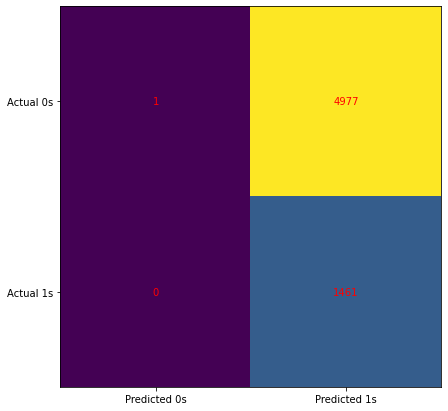

In [120]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

Now we will focus on finding the optimal threshold value

In [69]:
pred_test=[]
pred_train = []
for model in [rf_model,log_classifier,ada_classifier,knn_classifier, gnb,cb_classifier,lg,xg,dt_classifier,svc_classifier]:
    pred_test.append(pd.Series(model.predict_proba(X_test)[:,1]))
    pred_train.append(pd.Series(model.predict_proba(X_train)[:,1]))
final_prediction=pd.concat(pred_test,axis=1).mean(axis=1)
final_prediction_train=pd.concat(pred_train,axis=1).mean(axis=1)
print('Ensemble train roc-auc: {}'.format(roc_auc_score(y_train,final_prediction_train)))
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble train roc-auc: 0.9999549514196376
Ensemble test roc-auc: 0.603691148651603


In [78]:
# Train Prediction classification report
print(classification_report(y_train,final_prediction_train))

# Test Prediction classification report
print(classification_report(y_test, final_prediction_test))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [70]:
ensemble_pred_test = pd.concat(pred_test,axis=1)
ensemble_pred_train = pd.concat(pred_train,axis=1)

In [72]:
ensemble_pred_test = ensemble_pred_test.rename(columns = {0:'RF',1:'LogReg', 2:'AdaBoost',3:'KNN',4:'NaiveBayes', 5:'CatBoost',6:'LGBM', 7:'XGBM', 8:'DecisionTree',9:'SupportVector'})
ensemble_pred_train = ensemble_pred_train.rename(columns = {0:'RF',1:'LogReg', 2:'AdaBoost',3:'KNN',4:'NaiveBayes', 5:'CatBoost',6:'LGBM', 7:'XGBM', 8:'DecisionTree',9:'SupportVector'})

In [73]:
ensemble_pred_test

,RF,LogReg,AdaBoost,KNN,NaiveBayes,CatBoost,LGBM,XGBM,DecisionTree,SupportVector
0,0.19,0.190477,0.484105,0.0,0.070017,0.041813,0.040006,0.028327,0.0,0.216623
1,0.12,0.185908,0.490089,0.2,0.359933,0.111782,0.124201,0.105518,0.0,0.216624
2,0.24,0.264258,0.493312,0.2,0.347190,0.262437,0.251824,0.299647,1.0,0.216620
3,0.22,0.053644,0.488791,0.2,0.035681,0.092546,0.165303,0.081286,0.0,0.238108
4,0.06,0.201314,0.489779,0.2,0.363784,0.130341,0.124532,0.096137,1.0,0.216624
...,...,...,...,...,...,...,...,...,...,...
6434,0.13,0.269505,0.492637,0.2,0.343742,0.196791,0.138717,0.142705,0.0,0.216623
6435,0.18,0.242899,0.494107,0.2,0.287545,0.241645,0.284038,0.307387,1.0,0.216629
6436,0.32,0.266866,0.495551,0.2,0.365644,0.257251,0.301580,0.273829,0.0,0.216626
6437,0.24,0.176821,0.491555,0.2,0.146905,0.210479,0.237878,0.122617,0.0,0.216636


In [109]:
final_prediction

0       0.205570
1       0.280510
2       0.463910
3       0.172968
4       0.335632
          ...   
6434    0.254899
6435    0.465327
6436    0.336722
6437    0.285199
6438    0.120292
Length: 6439, dtype: float64

In [74]:

#### Calculate the ROc Curve


fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
auc = metrics.roc_auc_score(y_test, final_prediction)
#plot_roc_curve(fpr,tpr)
thresholds

array([1.51094645, 0.51094645, 0.51073204, ..., 0.10850632, 0.10842125,
       0.07220203])

In [75]:
auc

0.603691148651603

In [76]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
9,0.457985,0.773723
8,0.459197,0.773723
11,0.450192,0.773567
16,0.437558,0.773567
15,0.438592,0.773567


In [85]:
accuracy_ls.iloc[0,0]

0.4579851117988599

In [86]:
y_pred_test = np.where(final_prediction>accuracy_ls.iloc[0,0],1,0)
y_pred_train = np.where(final_prediction_train>accuracy_ls.iloc[0,0],1,0)

In [92]:
y_pred_test = pd.Series(y_pred_test)
y_pred_train = pd.Series(y_pred_train)

In [90]:
type(y_train)

pandas.core.series.Series

In [94]:
# Train Prediction classification report
print(classification_report(y_train,y_pred_train))

# Test Prediction classification report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89     20173
           1       1.00      0.14      0.24      5579

    accuracy                           0.81     25752
   macro avg       0.90      0.57      0.57     25752
weighted avg       0.85      0.81      0.75     25752

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      4978
           1       0.64      0.01      0.01      1461

    accuracy                           0.77      6439
   macro avg       0.71      0.50      0.44      6439
weighted avg       0.74      0.77      0.68      6439



In [74]:

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    print('AUC:', auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    #auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.legend()
    plt.show( )

AUC: 0.625580892683454


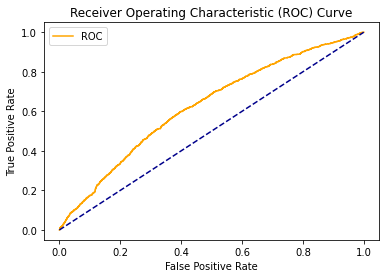

In [75]:
plot_roc_curve(fpr,tpr)

In [51]:
import scikitplot as skplt
import matplotlib.pyplot as plt